In [1]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

from keras.utils import to_categorical
#from keras.layers import LeakyReLU
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random 

In [2]:
#DATADIR = '//ibs9010/current_data/Data_Keshav/Cropped_Images/MG23plus48/'
#DATADIR = '//ibs9010/current_data/Data_Keshav/Cropped_Images/test/S5152/'
DATADIR = '//ibs9010/current_data/Data_Keshav/Cropped_Images/trial23/'
#DATADIR = '//ibs9010/current_data/Data_Keshav/Cropped_Images/trial5/'
CATEGORIES = ["Background","Neuron"]
def create_training_data():
    Training_Data = []
    img_size = 90
    X = []
    y = []
    for categories in CATEGORIES:
        print(categories)
        Path = os.path.join(DATADIR,categories) # gives the path to the images; Data/Train/Image or Background
        class_num = CATEGORIES.index(categories) # numbers the classes
        print(Path,class_num)
        print(len(os.listdir(DATADIR+"/Background/")))
        print(len(os.listdir(DATADIR+"/Neuron/")))
        try:
            for img in os.listdir(Path): #gives the images from the path
                #print(len(os.listdir(Path)))
                img_array = cv2.imread(os.path.join(Path,img),cv2.IMREAD_GRAYSCALE) 
                if img_array.any():
                    s1,s2  = img_array.shape
                    if s1 != img_size or s2 != img_size:
                        print(s1,s2)
                    #print(img_array)    
                    Training_Data.append([img_array,class_num])
            #print(Training_Data)
            
        except Exception as e:
            print('cant include the file')
            #pass
    random.shuffle(Training_Data) # do it before conversion to array as list is mutable
    #print("Length of training data 1:",len(Training_Data))
    for features,labels in Training_Data:
        X.append(features)
        y.append(labels)
    #print(len(X))
    #print(len(y))
    #try:
    #print("Length of training data:",len(Training_Data))
    X = np.array(X).reshape(-1,img_size,img_size,1) # converts it to arrays with shape (number of images,dim of image)
    y = np.array(y)
    X = X/255.0 # this is normalization of only the images
    #except Exception as e:
     #       pass
    #print(y[5])
    
    print("Length of training data:",len(Training_Data))
    return X,y

X,y = create_training_data()

Background
//ibs9010/current_data/Data_Keshav/Cropped_Images/trial23/Background 0
13485
1509
cant include the file
Neuron
//ibs9010/current_data/Data_Keshav/Cropped_Images/trial23/Neuron 1
16851
1509
Length of training data: 10582


In [3]:
#def binary_classification_model():
model = Sequential()

model.add(Conv2D(256,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu")) # added a hidden layer

model.add(Dense(64))
model.add(Activation("relu")) # added a new hidden layer

# model.add(Dense(64))
# model.add(Activation("relu")) # added a new hidden layer

# model.add(Dense(64))
# model.add(Activation("relu")) # added a new hidden layer

model.add(Dense(2))
#model.add(Dense(4))
#model.add(Activation('softmax')) # chaging from sigmoid to softmax to include more classes
model.add(Activation('sigmoid'))
########################
#class_weight = {0: 1., 1: 15.}
#class_weight = {0: 5, 1: 10., 2: 1., 3:5.}
########################

#filepath="weights.best.hdf5"
ada = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#model.compile(loss ="categorical_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
model.compile(loss ="binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
y_train=to_categorical(y, num_classes=2)

model.summary()
#lr_model_history=model.fit(X,y_train,batch_size=64,epochs= 10,validation_split=0.1,class_weight=class_weight)
lr_model_history=model.fit(X,y_train,batch_size=32,epochs= 20,validation_split=0.1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 90, 90, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 90, 90, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 45, 45, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 128)       295040    
_________________________________________________________________
activation_1 (Activation)    (None, 45, 45, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0

In [4]:
model.save("//ibs9010/current_data/Data_Keshav/image/Classification_model/NeuronClassifierModels/BinaryClassifier_automatic_trial23_20epoch_2layers.h5")  

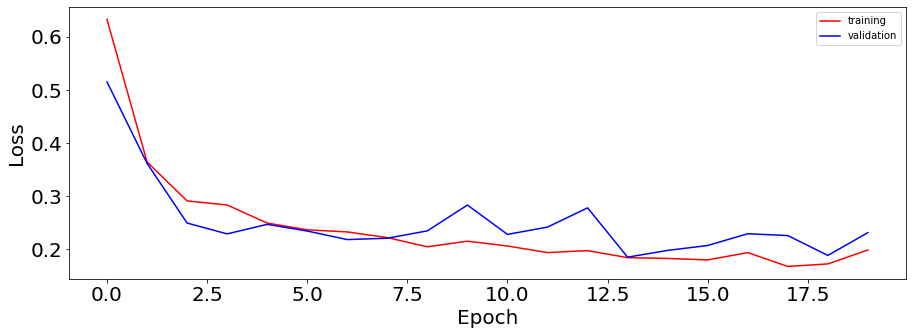

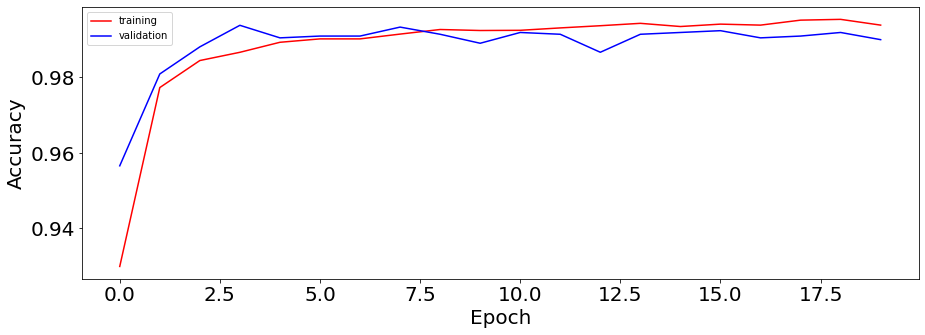

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='training')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='validation')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(np.sqrt(lr_model_history.history['accuracy']), 'r', label='training')
ax.plot(np.sqrt(lr_model_history.history['val_accuracy']), 'b' ,label='validation')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

## Loading Model

## Running inference on all Tiles 

In [11]:
import os
import cv2
import numpy as np
img_size = 90 # fix the size of the image
#Path = "//ibs9010/current_data/Data_Keshav/Cropped_Images/100tile/S51/" 
#Path = "//ibs9010/current_data/Data_Keshav/Cropped_Images/trial90/Neuron/"
Path = '//ibs9010/current_data/Data_Keshav/Cropped_Images/90tile/MG23_bs/S22/'
Testing_image = []# list of testing images
image_name = []# list of image names

for img in os.listdir(Path): #gives the images from the path
    img_array = cv2.imread(os.path.join(Path,img),cv2.IMREAD_GRAYSCALE) # read every image in gray scale from the given path
    Testing_image.append(img_array)
    image_name.append(img)
    
print("Number of test images:",len(Testing_image))
#Running Inference
Test_image = np.array(Testing_image).reshape(-1,img_size,img_size,1)
#make an array of every element of list from Testing_image and then reshape them
Test_image = Test_image/255.0
scores = model.predict_classes(Test_image)

# Results
neuron_image_counter = bkgd_image_counter = 0
for i in range(len(Test_image)):
    if scores[i]==0:
        bkgd_image_counter +=1
    if scores[i]==1:
        neuron_image_counter += 1
    
print("Total testing images:",len(Testing_image))
print("bkgd_image_counter:",bkgd_image_counter,"neuron_image_counter:",neuron_image_counter)


Number of test images: 5762
Total testing images: 5762
bkgd_image_counter: 5740 neuron_image_counter: 22


In [12]:
## Saving classified tiles into respective folders

# saving the single neuron tiles into a particular folder for now 
dest_path = '//ibs9010/current_data/Data_Keshav/image/Classification_model/Inference/BinaryClasses/trial'
#dest_path = "//ibs9010/current_data/Data_Keshav/image/Classification_model/Inference/BinaryClasses/NewTestsingleneurontiles"
#directory = '//ibs9010/current_data/Data_Keshav/image/Classification_model/Data/Test/'

# Delete all exiting images
import glob
os.chdir(dest_path)
files=glob.glob('*.tif')
for filename in files:
    os.unlink(filename)
    
#need the images of class1 to be appended in a separate list
single_image_list  = [] # contains list of filenames of single neurons
#sn_images = [] # conatins tiles of single neurons #(actual images itself)
for k in range(1,len(Test_image)):
    if scores[k]==1:
        #print(Test_image[i])
        #print("Image ",image_name[k])
        #sn_images.append(Test_image[i])
        single_image_list.append(image_name[k])
        
print(len(single_image_list))  
#image_name[i]
for i in range(len(Test_image)):
    if scores[i]==1:
        #print("Image:",image_name[i])
        #print("TestImage:",Test_image[i])
        #cv2.imwrite(image_name[i], Test_image[i])
        cv2.imwrite(os.path.join(dest_path,image_name[i]), Test_image[i]*255)
        #pass

# Generating Pickle files for classified tiles
## To be used for generating landmarks

22


In [8]:
# saving the bkgd neuron tiles into a particular folder for now - as a adhoc fix!

#dest_path = '//ibs9010/current_data/Data_Keshav/image/Classification_model/Inference/BinaryClasses/NewTestbackgroundneurontiles'
dest_path = '//ibs9010/current_data/Data_Keshav/image/Classification_model/Inference/BinaryClasses/backgroundneurontiles/'
directory = '//ibs9010/current_data/Data_Keshav/image/Classification_model/Data/Test/'

# Delete all exiting images
import glob
os.chdir(dest_path)
files=glob.glob('*.tif')
for filename in files:
    os.unlink(filename)

#need the images of class1 to be appended in a separate list
bkgd_image_list  = [] # contains list of filenames of single neurons
#sn_images = [] # conatins tiles of single neurons #(actual images itself)
for k in range(1,len(Test_image)):
    if scores[k]==0:
        #print(Test_image[i])
        #print("Image ",image_name[k])
        #sn_images.append(Test_image[i])
        bkgd_image_list.append(image_name[k])
        
print(len(bkgd_image_list))  
#image_name[i]
for i in range(len(Test_image)):
    if scores[i]==0:
        #print("Image:",image_name[i])
        #print("TestImage:",Test_image[i])
        #cv2.imwrite(image_name[i], Test_image[i])
        cv2.imwrite(os.path.join(dest_path,image_name[i]), Test_image[i]*255)
        #pass

4660


In [ ]:
#from tensorflow import keras
#import keras
#import tensorflow as tf 
from keras.models import load_model
model = load_model('//ibs9010/current_data/Data_Keshav/image/Classification_model/NeuronClassifierModels/BinaryClassifier_manual_every5thsection_15epoch.h5')

In [ ]:
# Generating pickle file For Single neurons
import pickle
with open('//ibs9010/current_data/Data_Keshav/image/Classification_model/17aug_10thsection_binary_SN_MG48_S51.pkl', 'wb') as f:
    pickle.dump(single_image_list, f)